# Sample rates
## Accelerometer and Schocksensor

Datenblatt: 1kHz

Results: ~110Hz with significant drops while writing to .csv file

    Resolution @ 110Hz, 60km/h(=16.7m/s): 15.2cm
    Resolution @ 110Hz, 20km/h(= 5.6m/s):  5.0cm
    # worst case:
    Resolution @  60Hz, 60km/h(=16.7m/s): 27.8cm

Geforderte Auflösung: 1cm -> 5cm unzureichend

Lösungen:
- Multithreading
- I2C Kommunikation selbst schreiben statt Bibliothek
- SPI Kommunikation
- C++-Programm

Start recording 360 samples to '../output/accelerometer_test_24_360.csv'


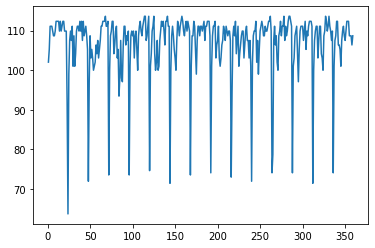

In [17]:
import sys
sys.path.append("/studienarbeit-cnn-untergrunderkennung/accelerometer")

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from record import Accelerometer

path = "../output/accelerometer_test_24_360.csv"

sensor = Accelerometer()
sensor.record_data(
    path=path,
    batchsize=24,
    samples=360
)

data = pd.read_csv(path)
plt.plot(1/data["time"].diff())

## GPS

Datenblatt -> drei Modi: 1Hz, 5Hz, 10Hz

Abnahme der Genauigkeit durch höhere Frequenz möglich

Messung: ziemlich stabil 10Hz mit Abweichungen in beide Richtungen

    Resolution @ 10Hz, 60km/h(=16.7m/s): 1.67m
    Resolution @ 10Hz, 20km/h(= 5.6m/s): 0.56m

Geforderte Auflösung: 1m -> 1.67m grenzwertig

Lösungsansätze:
- Hardware geht nicht schneller
- Glättung der Positionskurve und Ermittlung neuer Messpunkte mit Abstand 1m

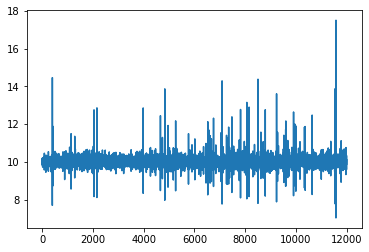

In [3]:
data = pd.read_csv("../output/gps_out_10.csv")
plt.plot(1/data["time"].diff())